<a href="https://colab.research.google.com/github/UrielMendoza/Curso-RV-python/blob/master/Jueves_resuelto.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


# Georreferencia y reproyeccion de datos vectoriales

**Geopandas**

Instalación

In [1]:
!pip install geopandas

     |████████████████████████████████| 921kB 2.8MB/s 
     |████████████████████████████████| 10.1MB 18.9MB/s 
     |████████████████████████████████| 11.8MB 39.1MB/s 


Apertura

In [0]:
import geopandas as gpd
df = gpd.read_file('/content/drive/My Drive/Curso-RV-python/hidro4mgw_c/hidro4mcw.shp')

Graficación

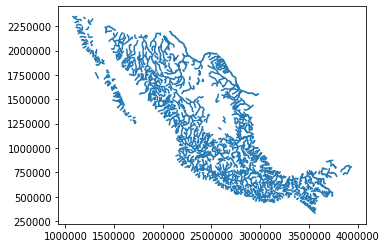

In [5]:
df.plot()

Reproyección

In [8]:
df.crs

{'datum': 'WGS84',
 'lat_0': 12,
 'lat_1': 17.5,
 'lat_2': 29.5,
 'lon_0': -102,
 'no_defs': True,
 'proj': 'lcc',
 'units': 'm',
 'x_0': 2500000,
 'y_0': 0}

In [11]:
df.geometry

0       LINESTRING (2067557.423 2197112.287, 2071730.7...
1       LINESTRING (2071730.751 2192639.254, 2074894.9...
2       LINESTRING (2074894.943 2195062.388, 2078077.9...
3       LINESTRING (2078077.985 2194784.597, 2082127.5...
4       LINESTRING (2082127.527 2190850.698, 2093579.3...
                              ...                        
2229    LINESTRING (1608371.196 1347645.419, 1611178.8...
2230    LINESTRING (1622633.847 1328556.486, 1623296.4...
2231    LINESTRING (1691865.531 1286811.247, 1691842.5...
2232    LINESTRING (1691842.501 1286812.781, 1688298.1...
2233    LINESTRING (1717172.219 1245742.299, 1717030.0...
Name: geometry, Length: 2234, dtype: geometry

In [13]:
dfGeo = df.to_crs({'init':'epsg:4326'})

/usr/local/lib/python3.6/dist-packages/pyproj/crs.py:77: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method.
  return _prepare_from_string(" ".join(pjargs))


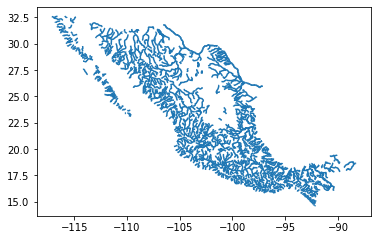

In [18]:
ax = dfGeo.plot()

Text(0.5, 1, 'EPSG:6372')

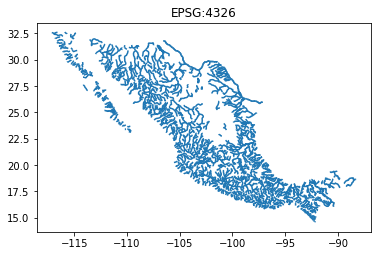

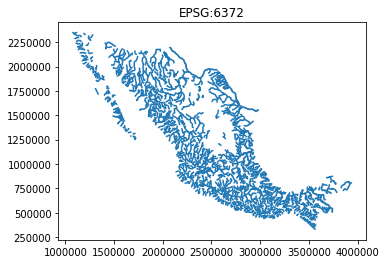

In [17]:
ax = dfGeo.plot()
ax.set_title('EPSG:4326')
ax = df.plot()
ax.set_title('EPSG:6372')